## Carga y limpieza de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cargar datos

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('../data/dataset_correlacion_satisfaccion.csv')

# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(30000, 13)


,id_estudiante,fecha_consulta,derivado,tipo_consulta,urgencia,tiempo_consulta,tiempo_espera,id_asesor,calidad_del_servicio,consulta_resuelta,puntaje_esfuerzo_cliente,indice_promotor_neto,satisfaccion_estudiante
0,E00001,2023-03-01,True,Queja,Baja,802,642,A248,2,True,5,77,3
1,E00002,2023-05-08,False,Consulta de matrícula,Baja,1514,474,A052,1,True,2,78,3
2,E00003,2023-06-03,True,Consulta de matrícula,Media,1285,691,A295,1,True,3,53,3
3,E00004,2024-09-14,True,Solicitud de documentos,Media,1525,1316,A201,2,True,4,40,3
4,E00005,2023-03-26,True,Queja,Media,1324,166,A150,3,True,2,70,3


In [3]:
# Eliminamos Id, ya que es solo un numero para identificar cada estudiante
data.drop('id_estudiante', axis=1, inplace=True)

data.shape

(30000, 12)

In [4]:
data.dtypes

fecha_consulta              object
derivado                      bool
tipo_consulta               object
urgencia                    object
tiempo_consulta              int64
tiempo_espera                int64
id_asesor                   object
calidad_del_servicio         int64
consulta_resuelta             bool
puntaje_esfuerzo_cliente     int64
indice_promotor_neto         int64
satisfaccion_estudiante      int64
dtype: object

Como no se visualizan valores nulos ni duplicados, no es necesario aplicar una limpieza de datos

## Transformación y codificación de variables
Podemos observar que hay variables como **derivado** que son booleanas y estan etiquetadas como True y False convirtiendolas a categóricas, para que nuestro modelo trabaje de mejor forma esta variable y otras como **urgencia** que es categorica, la vamos a transformar en numéricas, con diferentes métodos de Encoding

In [5]:
# Codificaciones
# Booleanas
data['derivado'] = data['derivado'].astype(int)
data['consulta_resuelta'] = data['consulta_resuelta'].astype(int)

# Categóricas ordinales
urgencia_map = {'Baja': 0, 'Media': 1, 'Alta': 2}
data['urgencia'] = data['urgencia'].map(urgencia_map)


# Asegúrate de que la fecha esté en formato datetime
data['fecha_consulta'] = pd.to_datetime(data['fecha_consulta'])


# Asegúrate de que la fecha esté en formato datetime
data['fecha_consulta'] = pd.to_datetime(data['fecha_consulta'])

# Crear columnas de año y mes
data['año'] = data['fecha_consulta'].dt.year
data['mes'] = data['fecha_consulta'].dt.month

# Crear una nueva columna con formato 'YYYY-MM' para agrupar fácilmente por mes y año
data['año_mes'] = data['fecha_consulta'].dt.to_period('M').astype(str)

# visualise the dataset
data.head()


,fecha_consulta,derivado,tipo_consulta,urgencia,tiempo_consulta,tiempo_espera,id_asesor,calidad_del_servicio,consulta_resuelta,puntaje_esfuerzo_cliente,indice_promotor_neto,satisfaccion_estudiante,año,mes,año_mes
0,2023-03-01,1,Queja,0,802,642,A248,2,1,5,77,3,2023,3,2023-03
1,2023-05-08,0,Consulta de matrícula,0,1514,474,A052,1,1,2,78,3,2023,5,2023-05
2,2023-06-03,1,Consulta de matrícula,1,1285,691,A295,1,1,3,53,3,2023,6,2023-06
3,2024-09-14,1,Solicitud de documentos,1,1525,1316,A201,2,1,4,40,3,2024,9,2024-09
4,2023-03-26,1,Queja,1,1324,166,A150,3,1,2,70,3,2023,3,2023-03


## Identificación de Variable Target

La variable **satisfaccion_estudiante** representa el nivel de satisfacción que un estudiante expresa tras interactuar con el servicio brindado por el chatbot o por un asesor. Esta métrica es clave para evaluar la efectividad del servicio, la calidad del soporte, y la percepción general del usuario.

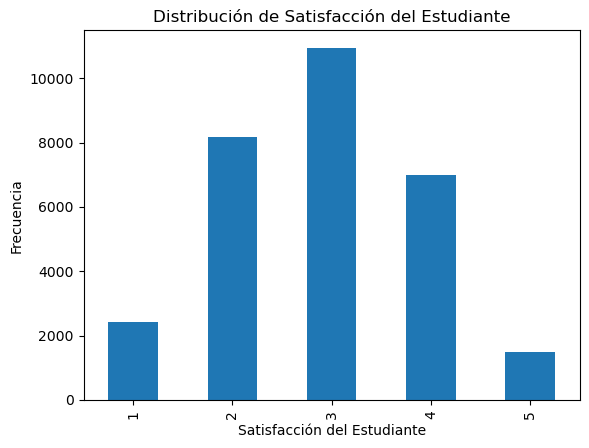

In [6]:
data['satisfaccion_estudiante'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Satisfacción del Estudiante')
plt.ylabel('Frecuencia')
plt.title('Distribución de Satisfacción del Estudiante')
plt.show()

Se puede observar que los datos de satisfacción se concentran en valores enteros, con una distribuccion aparentemente uniforme, con una ligera predisposicion hacia el 2.

## Tipos de Variables
A continuación, identificamos las variables categóricas y numéricas

In [7]:
# identifiquemos las variables categóricas
# capturaremos aquellas de tipo *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']


# agreguemos MSSubClass a la lista de variables categóricas
len(cat_vars)

3

In [8]:
# Convertir todas las variables categoricas a tipo object
data[cat_vars] = data[cat_vars].astype('O')

In [9]:
# identifiquemos las variables numéricas
num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'revenue'
]

len(num_vars)


12

## Analisis Univariado
### Variables Numéricas

In [10]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  12


,fecha_consulta,derivado,urgencia,tiempo_consulta,tiempo_espera,calidad_del_servicio,consulta_resuelta,puntaje_esfuerzo_cliente,indice_promotor_neto,satisfaccion_estudiante,año,mes
0,2023-03-01,1,0,802,642,2,1,5,77,3,2023,3
1,2023-05-08,0,0,1514,474,1,1,2,78,3,2023,5
2,2023-06-03,1,1,1285,691,1,1,3,53,3,2023,6
3,2024-09-14,1,1,1525,1316,2,1,4,40,3,2024,9
4,2023-03-26,1,1,1324,166,3,1,2,70,3,2023,3


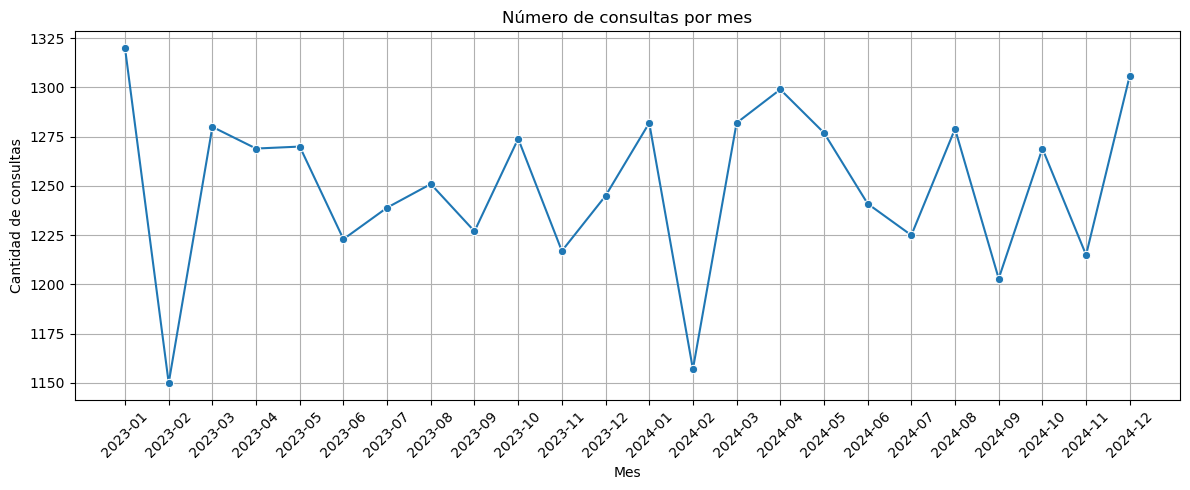


📊 Variable Numérica: fecha_consulta


count                         30000
mean     2023-12-31 08:02:52.800000
min             2023-01-01 00:00:00
25%             2023-06-30 00:00:00
50%             2024-01-01 00:00:00
75%             2024-06-30 00:00:00
max             2024-12-31 00:00:00
Name: fecha_consulta, dtype: object

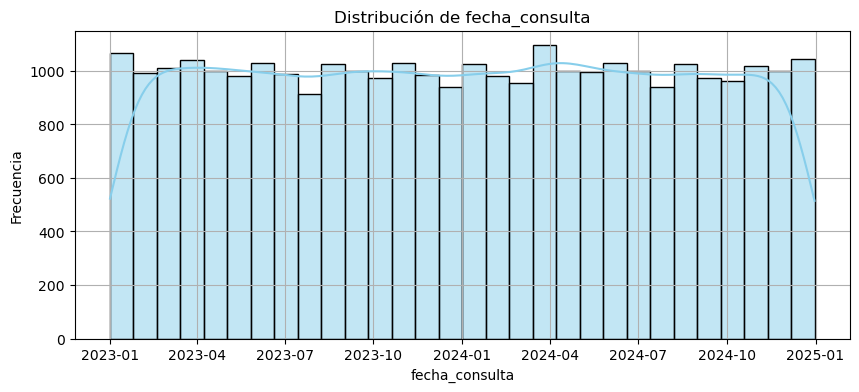

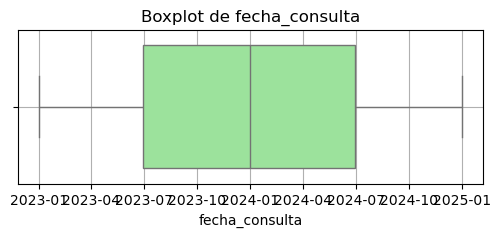


📊 Variable Numérica: urgencia


count    30000.000000
mean         0.897633
std          0.699789
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: urgencia, dtype: float64

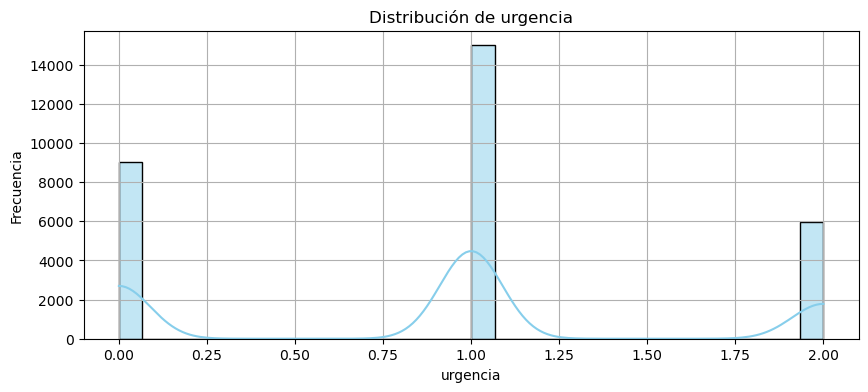

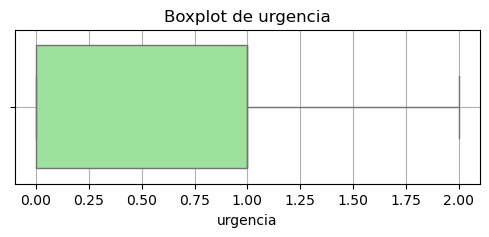


📊 Variable Numérica: tiempo_consulta


count    30000.000000
mean      1222.171100
std        360.729638
min         30.000000
25%        979.000000
50%       1222.000000
75%       1465.000000
max       2656.000000
Name: tiempo_consulta, dtype: float64

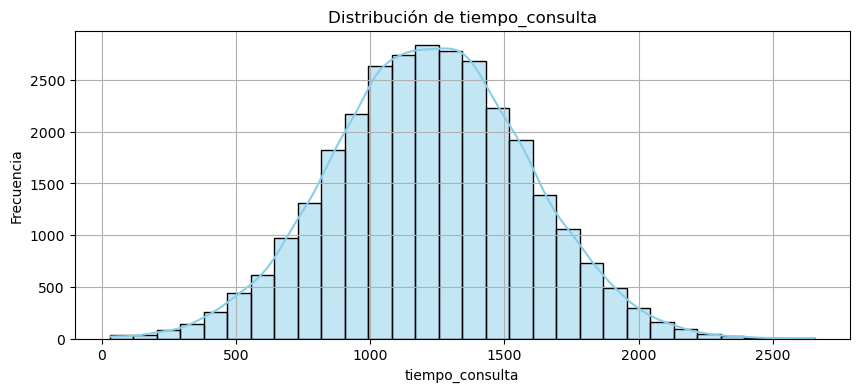

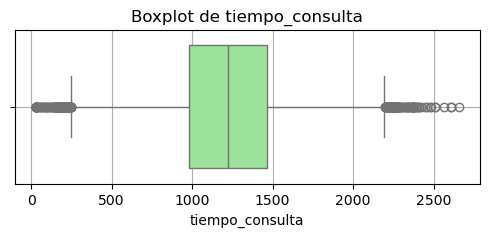


📊 Variable Numérica: tiempo_espera


count    30000.000000
mean       629.129967
std        451.790836
min          5.000000
25%        256.000000
50%        605.000000
75%        952.250000
max       2256.000000
Name: tiempo_espera, dtype: float64

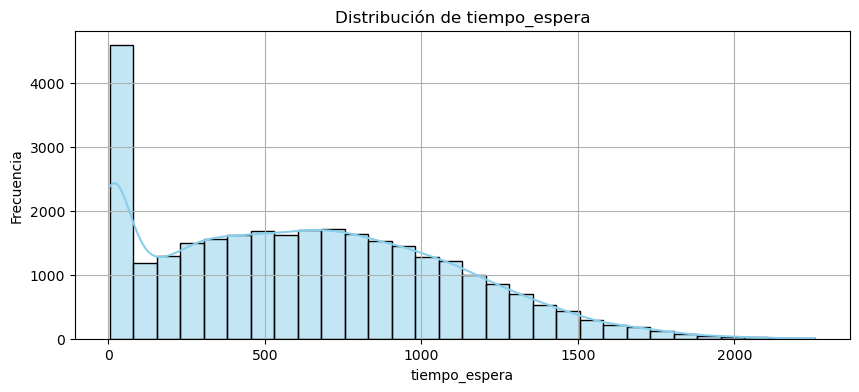

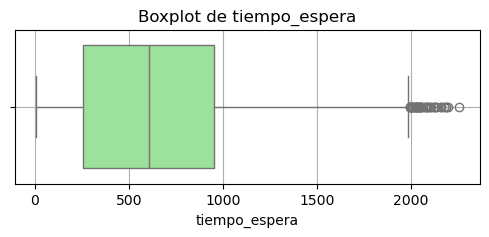


📊 Variable Numérica: calidad_del_servicio


count    30000.000000
mean         2.002467
std          0.816098
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: calidad_del_servicio, dtype: float64

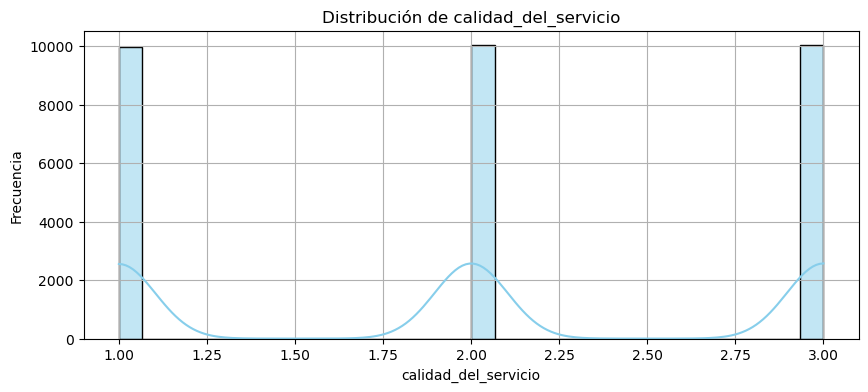

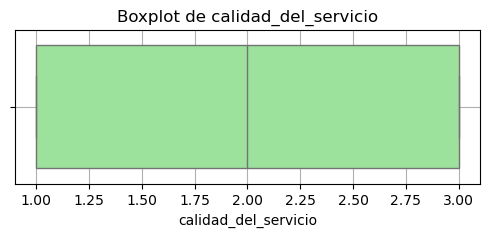


📊 Variable Numérica: puntaje_esfuerzo_cliente


count    30000.000000
mean         3.004133
std          1.418843
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: puntaje_esfuerzo_cliente, dtype: float64

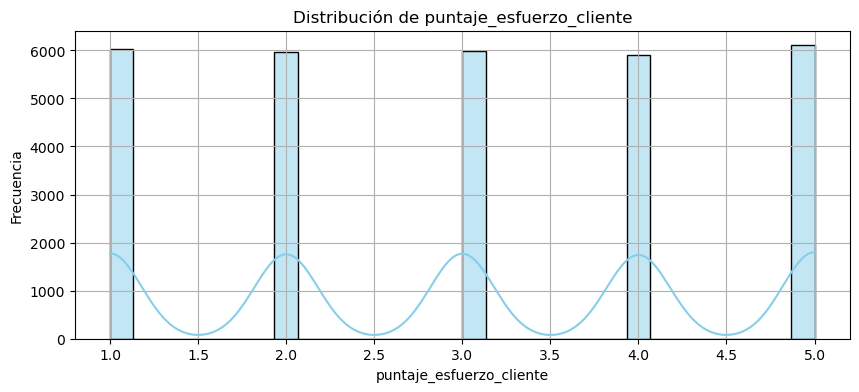

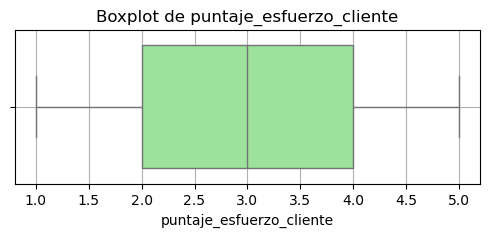


📊 Variable Numérica: indice_promotor_neto


count    30000.00000
mean        57.34460
std         23.30256
min          0.00000
25%         41.00000
50%         57.00000
75%         74.00000
max        119.00000
Name: indice_promotor_neto, dtype: float64

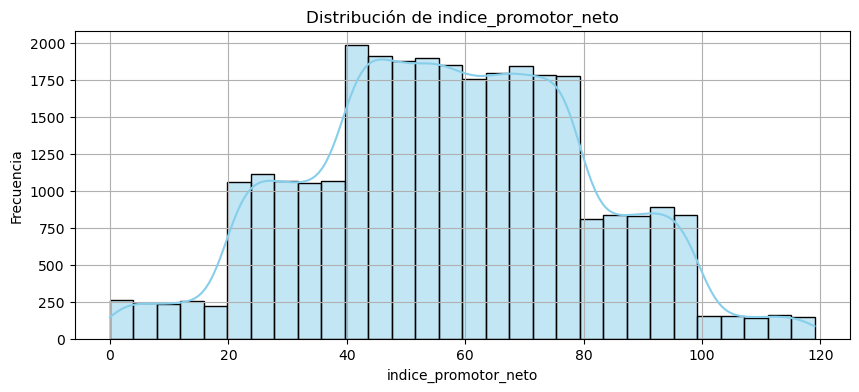

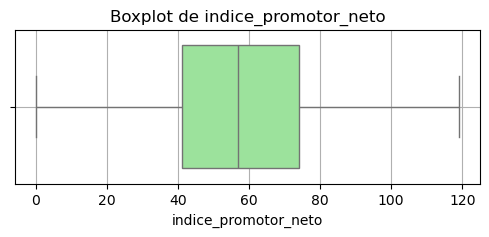


📊 Variable Numérica: satisfaccion_estudiante


count    30000.000000
mean         2.897900
std          1.007394
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: satisfaccion_estudiante, dtype: float64

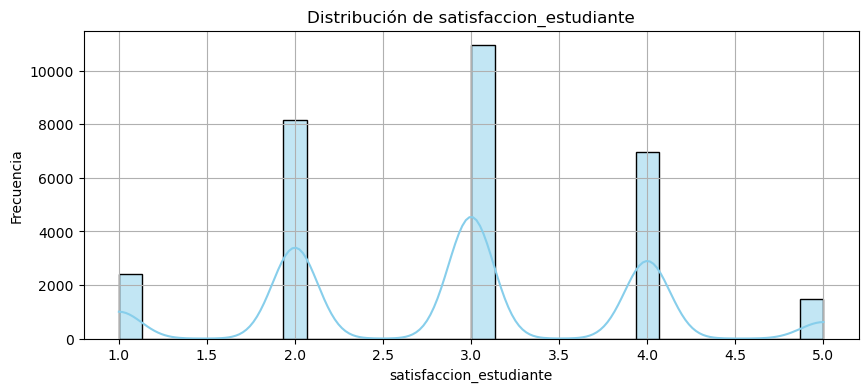

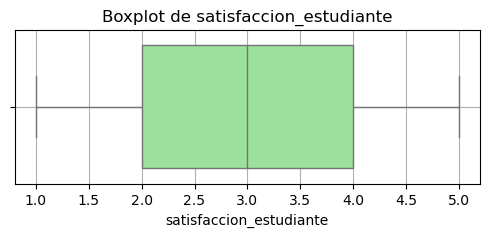


📊 Variable Numérica: año


count    30000.000000
mean      2023.501167
std          0.500007
min       2023.000000
25%       2023.000000
50%       2024.000000
75%       2024.000000
max       2024.000000
Name: año, dtype: float64

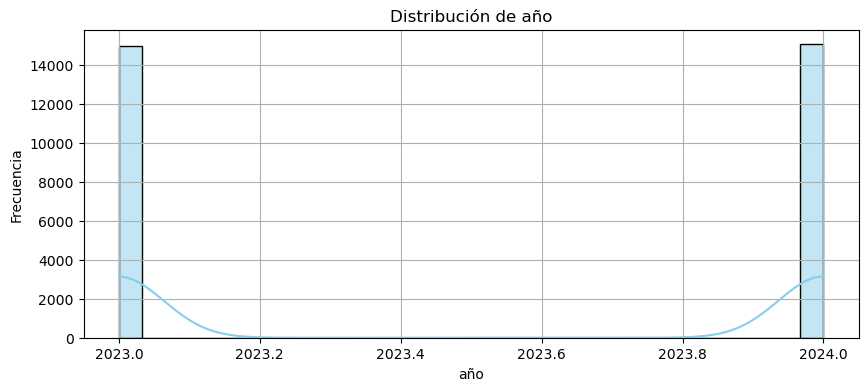

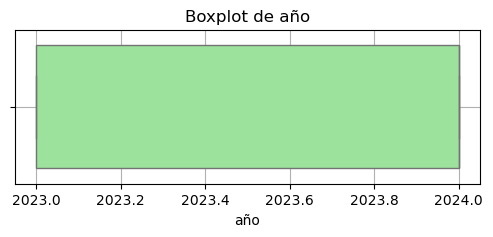


📊 Variable Numérica: mes


count    30000.000000
mean         6.494833
std          3.455832
min          1.000000
25%          4.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: mes, dtype: float64

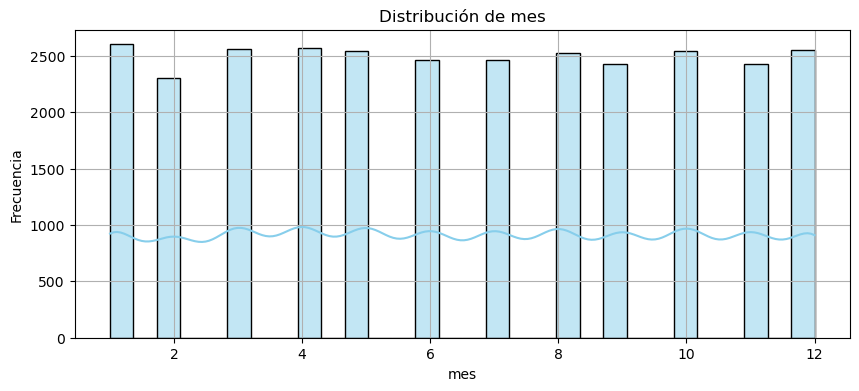

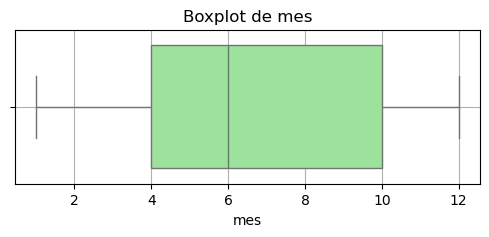


📊 Variable Booleana: derivado


count    30000.000000
mean         0.499433
std          0.500008
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: derivado, dtype: float64

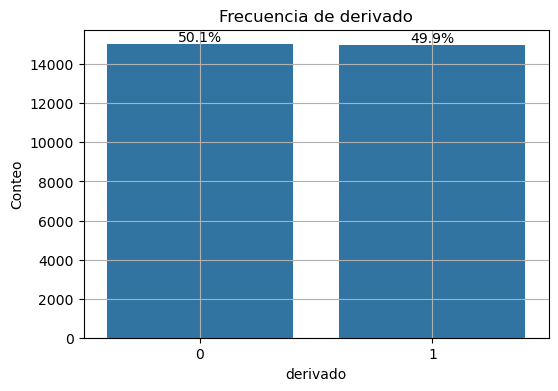


📊 Variable Booleana: consulta_resuelta


count    30000.000000
mean         0.800533
std          0.399606
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: consulta_resuelta, dtype: float64

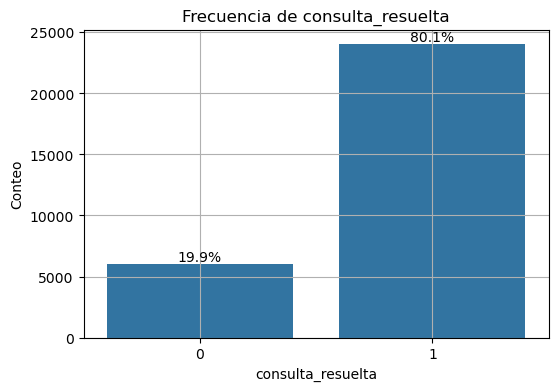

In [11]:
# Identificar booleanas y numéricas
bool_vars = ['derivado', 'consulta_resuelta']
numeric_vars = [var for var in num_vars if var not in bool_vars]


# Visualizar agrupación por mes y año
consulta_por_mes = data.groupby('año_mes').size().reset_index(name='conteo')

plt.figure(figsize=(12, 5))
sns.lineplot(data=consulta_por_mes, x='año_mes', y='conteo', marker='o')
plt.title('Número de consultas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de consultas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis para variables numéricas (excluyendo las booleanas)
for var in numeric_vars:
    print(f'\n📊 Variable Numérica: {var}')
    display(data[var].describe())

    plt.figure(figsize=(10, 4))
    sns.histplot(data[var], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()

# Análisis para variables booleanas
for var in bool_vars:
    print(f'\n📊 Variable Booleana: {var}')
    display(data[var].describe())

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var, data=data)
    
    # Mostrar etiquetas con porcentajes sobre las barras
    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percent = f'{100 * count / total:.1f}%'
        ax.annotate(percent, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.grid(True)
    plt.show()


### Variables Categóricas

In [12]:
print('Number of categorical variables: ', len(cat_vars))

# visualise the numerical variables
data[cat_vars].head()

Number of categorical variables:  3


,tipo_consulta,id_asesor,año_mes
0,Queja,A248,2023-03
1,Consulta de matrícula,A052,2023-05
2,Consulta de matrícula,A295,2023-06
3,Solicitud de documentos,A201,2024-09
4,Queja,A150,2023-03



📋 Variable Categórica: tipo_consulta


tipo_consulta
Queja                      6031
Consulta de trámites       6025
Consulta de matrícula      6016
Información general        5968
Solicitud de documentos    5960
Name: count, dtype: int64

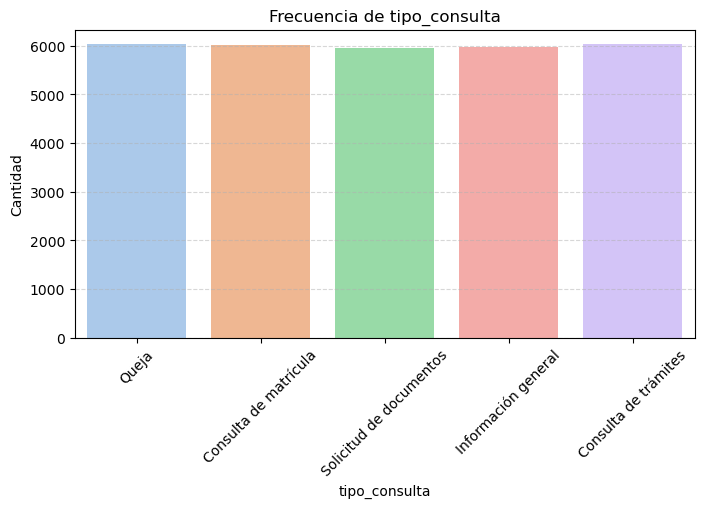


📋 Variable Categórica: id_asesor


id_asesor
A355    87
A386    82
A277    82
A472    79
A465    79
        ..
A036    40
A293    39
A061    38
A486    38
A091    36
Name: count, Length: 500, dtype: int64

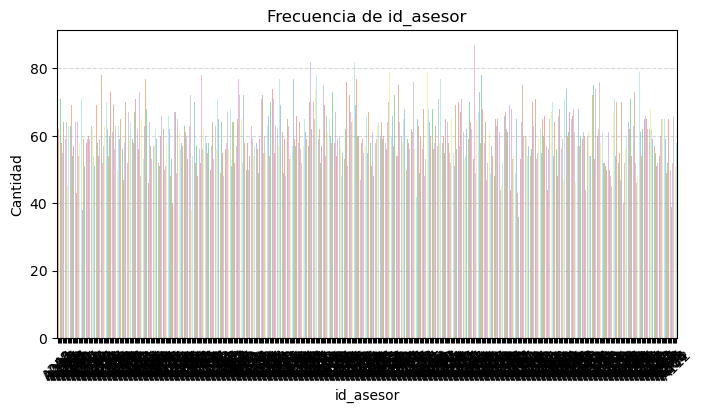


📋 Variable Categórica: año_mes


año_mes
2023-01    1320
2024-12    1306
2024-04    1299
2024-03    1282
2024-01    1282
2023-03    1280
2024-08    1279
2024-05    1277
2023-10    1274
2023-05    1270
2024-10    1269
2023-04    1269
2023-08    1251
2023-12    1245
2024-06    1241
2023-07    1239
2023-09    1227
2024-07    1225
2023-06    1223
2023-11    1217
2024-11    1215
2024-09    1203
2024-02    1157
2023-02    1150
Name: count, dtype: int64

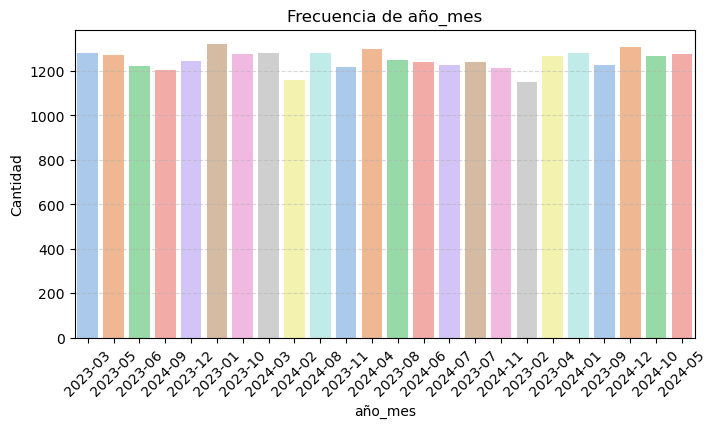

In [13]:
# Análisis univariado para variables categóricas
for var in cat_vars:
    print(f'\n📋 Variable Categórica: {var}')
    display(data[var].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue=var, data=data, palette='pastel', legend=False)
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()